In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Marco Teorico

Un modelo de Machine Learning necesita:
    - Datos
    - Modelo
    - Funcion Objetivo
    - Algoritmo de Optimizacion

# Data Generation

In [5]:
observations = 1000

# se generan 1000 muestras de dos variables (x y z) con datos que varian entre -10 y 10
xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

# se agrupan las variables en dos columnas
generated_inputs = np.column_stack((xs, zs))

# se genera 1000 ruidos para insertar a las salidas y simular la aleatoriedad de los datos
noise = np.random.uniform(-1, 1, (observations, 1))

# se generan las salidas con comportamiento lineal en funcion de las entradas (x y z) agregando un ruido aleatorio
generated_targets = 2*xs - 3*zs + 5 + noise

# se guardan los datos en un archivo .npz, que permite almacenar array multidimensionales (que permiten representar tensors)
# ya que tensorflow trabaja principalmente con tensors
np.savez('tf_intro', inputs=generated_inputs, targets=generated_targets)

# Solving with TensorFlow

In [6]:
# Datos
training_data = np.load('tf_intro.npz')

In [20]:
input_size = 2
output_size = 1

# Modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        output_size, 
        # parametros opcionales
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), # kernel = weights
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

# Funcion Objetivo (Mean Squared Error) y Algoritmo de Optimizacion (Stochastic Gradient Descent)
# model.compile(optimizer='SGD', loss='mean_squared_error')

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# verbose es para indicar el tipo de salida que queremos ver por consola sobre el progreso del training
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 355us/sample - loss: 33.4009
Epoch 2/100
1000/1000 [==============================] - 0s 68us/sample - loss: 1.1060
Epoch 3/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.4393
Epoch 4/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.3959
Epoch 5/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.3907
Epoch 6/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.4089
Epoch 7/100
1000/1000 [==============================] - 0s 54us/sample - loss: 0.3727
Epoch 8/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.4157
Epoch 9/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.3811
Epoch 10/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.4030
Epoch 11/100
1000/1000 [==============================] - 0s 85us/sample - loss: 0.3790
Epoch 12/100
1000

1000/1000 [==============================] - 0s 49us/sample - loss: 0.4447
Epoch 94/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.3795
Epoch 95/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.3713
Epoch 96/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.4103
Epoch 97/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.3712
Epoch 98/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.4105
Epoch 99/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.3974
Epoch 100/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4122


# Extracting the Weights and Bias

In [21]:
weights = model.layers[0].get_weights()[0]
weigths

array([[ 2.0080104],
       [-2.9987197]], dtype=float32)

In [22]:
weights = model.layers[0].get_weights()[0]
bias

array([5.008876], dtype=float32)

# Making Predictions

In [23]:
y_pred = model.predict_on_batch(training_data['inputs'])

# Plotting the Data

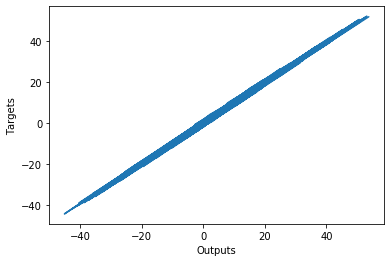

In [24]:
plt.plot(np.squeeze(y_pred), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()